# Text Categorisation

### Importing Data

In [3]:
import os
import pandas as pd

In [4]:
dir = "learn-ai-bbc"
df_1 = pd.read_csv(os.path.join(dir, 'BBC News Train.csv'))
df_2 = pd.read_csv(os.path.join(dir, 'BBC News Test.csv'))

In [5]:
df_1.head(3)

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business

In [6]:
df_2.head(3)

ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...

In [7]:
df = pd.concat([df_1[["ArticleId", "Text"]], df_2], ignore_index=True)
df.shape

(2225, 2)

### Vectorisation

In [8]:
from nltk.tokenize import word_tokenize

df['Tokens'] = df['Text'].apply(word_tokenize)
df.head(3)

ArticleId                                               Text  \
0       1833  worldcom ex-boss launches defence lawyers defe...   
1        154  german business confidence slides german busin...   
2       1101  bbc poll indicates economic gloom citizens in ...   

                                              Tokens  
0  [worldcom, ex-boss, launches, defence, lawyers...  
1  [german, business, confidence, slides, german,...  
2  [bbc, poll, indicates, economic, gloom, citize...

In [9]:
from nltk.corpus import stopwords

eng_stopwords = set(stopwords.words("english"))

df['Tokens_wo_SW'] = df['Tokens'].apply(lambda tokens: [token for token in tokens if token not in eng_stopwords])
df.head(3)

ArticleId                                               Text  \
0       1833  worldcom ex-boss launches defence lawyers defe...   
1        154  german business confidence slides german busin...   
2       1101  bbc poll indicates economic gloom citizens in ...   

                                              Tokens  \
0  [worldcom, ex-boss, launches, defence, lawyers...   
1  [german, business, confidence, slides, german,...   
2  [bbc, poll, indicates, economic, gloom, citize...   

                                        Tokens_wo_SW  
0  [worldcom, ex-boss, launches, defence, lawyers...  
1  [german, business, confidence, slides, german,...  
2  [bbc, poll, indicates, economic, gloom, citize...

In [10]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df["Lemmatized"] = df["Tokens_wo_SW"].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])
df.head(3)

ArticleId                                               Text  \
0       1833  worldcom ex-boss launches defence lawyers defe...   
1        154  german business confidence slides german busin...   
2       1101  bbc poll indicates economic gloom citizens in ...   

                                              Tokens  \
0  [worldcom, ex-boss, launches, defence, lawyers...   
1  [german, business, confidence, slides, german,...   
2  [bbc, poll, indicates, economic, gloom, citize...   

                                        Tokens_wo_SW  \
0  [worldcom, ex-boss, launches, defence, lawyers...   
1  [german, business, confidence, slides, german,...   
2  [bbc, poll, indicates, economic, gloom, citize...   

                                          Lemmatized  
0  [worldcom, ex-boss, launch, defence, lawyer, d...  
1  [german, business, confidence, slide, german, ...  
2  [bbc, poll, indicates, economic, gloom, citize...

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

df["Final_Text"] = df["Lemmatized"].apply(lambda tokens: " ".join(tokens))

vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(df['Final_Text'])

In [12]:
tfidf_matrix.shape

(2225, 26214)

### Dimensionality Reduction

In [13]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state=23)
tfidf_reduced = pca.fit_transform(np.asarray(tfidf_matrix.todense()))
tfidf_reduced.shape

### Clustering

In [ ]:
from sklearn.cluster import KMeans

k_range = range(2, 50)
intertias = []
for k in k_range:
    print(f"Running k:{k}")
    k_means = KMeans(n_clusters=k, random_state=23)
    k_means.fit(tfidf_reduced)
    intertias.append(k_means.inertia_)

Running k:2
Running k:3
Running k:4
Running k:5
Running k:6
Running k:7
Running k:8
Running k:9
Running k:10
Running k:11
Running k:12
Running k:13
Running k:14
Running k:15
Running k:16
Running k:17
Running k:18
Running k:19
Running k:20
Running k:21
Running k:22
Running k:23
Running k:24
Running k:25
Running k:26
Running k:27
Running k:28
Running k:29
Running k:30
Running k:31
Running k:32
Running k:33
Running k:34
Running k:35
Running k:36
Running k:37
Running k:38
Running k:39
Running k:40
Running k:41
Running k:42
Running k:43
Running k:44
Running k:45
Running k:46
Running k:47
Running k:48
Running k:49


In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_range, intertias)
plt.grid("on")
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS - Within Cluster Sum of Squares")

Text(0, 0.5, 'WCSS - Within Cluster Sum of Squares')

In [ ]:
n_clusters = 15
k_means = KMeans(n_clusters=n_clusters, random_state=23)
k_means.fit(tfidf_reduced)
y_pred = k_means.predict(tfidf_reduced)
df['cluster'] = y_pred

### t-SNE Visualisation

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=50, init="pca", learning_rate="auto")
tfidf_embed = tsne.fit_transform(tfidf_matrix.toarray())

/Users/ajaydyavathi/miniforge3/envs/tf/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


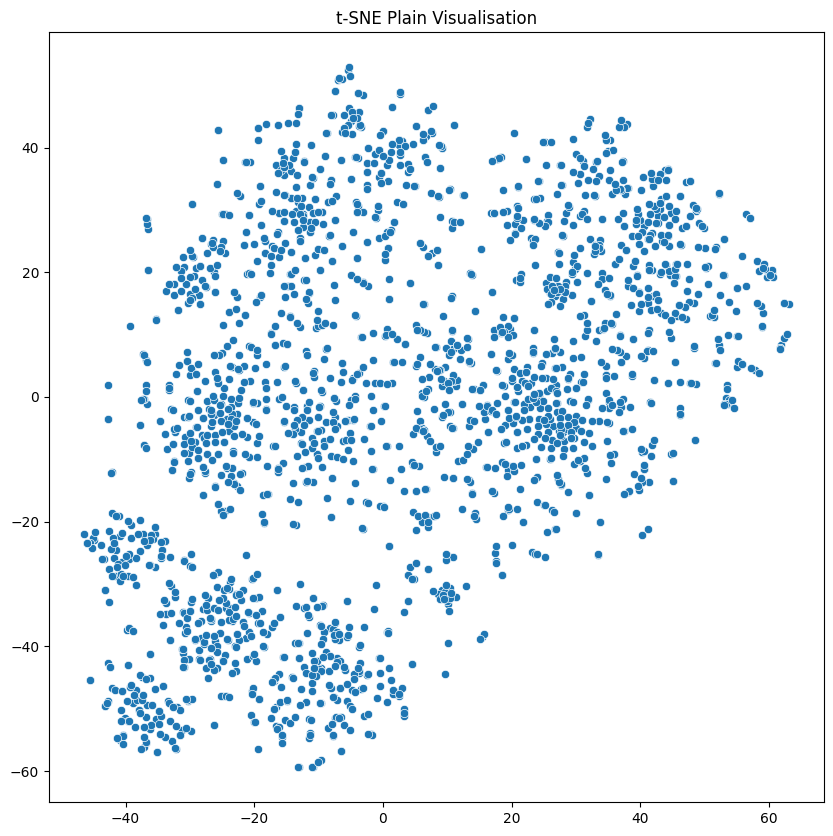

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=tfidf_embed[:, 0], y=tfidf_embed[:, 1])
plt.title("t-SNE Plain Visualisation")
plt.savefig("BBC_articles_plain.png")
plt.show()

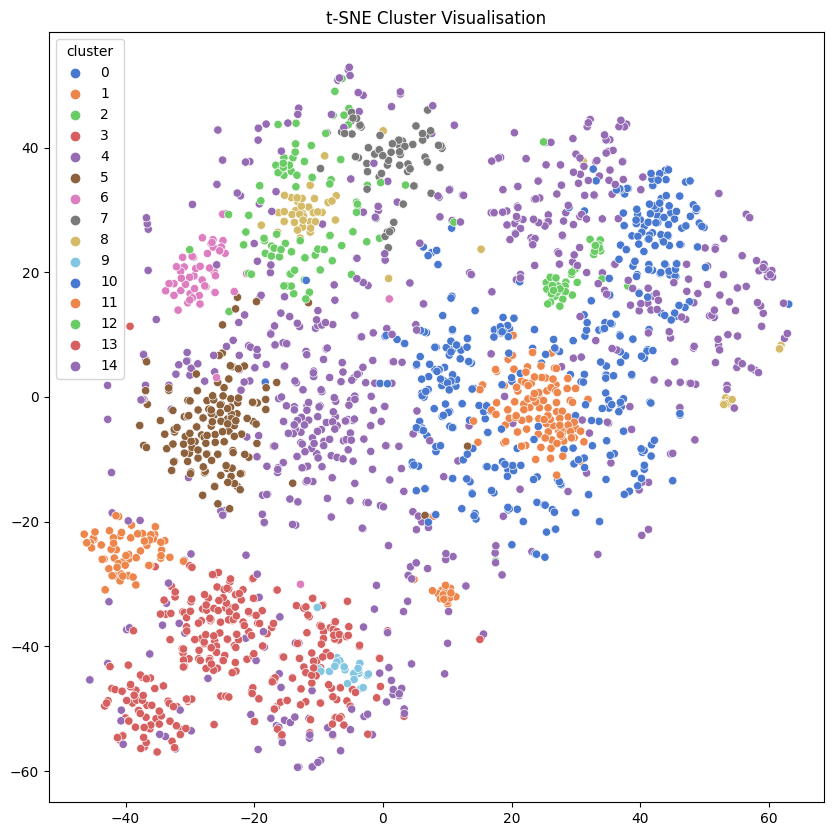

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=tfidf_embed[:, 0], y=tfidf_embed[:, 1], hue=df['cluster'], palette="muted")
plt.title("t-SNE Cluster Visualisation")
plt.savefig("BBC_articles_cluster.png")
plt.show()

### Topic Association

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


select = 3
n_topics = 10

cluster_topics = {}
for cluster in range(n_clusters):
    count_vec = CountVectorizer(min_df=10, stop_words="english")
    counted_data = count_vec.fit_transform(df[df['cluster'] == cluster]['Final_Text'])
    
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=20, random_state=23)
    lda.fit_transform(counted_data)

    word_value_pairs = []
    seen_words = []
    for i, topic in enumerate(lda.components_):
        topic_sorted = topic.argsort()[:-select-1:-1]
        words = [(count_vec.get_feature_names_out()[idx], topic[idx]) for idx in topic_sorted]
        for word in words:
            word_name, value = word
            if word_name not in seen_words:
                word_value_pairs.append(word)
                seen_words.append(word_name)
    
    sorted_pairs = sorted(word_value_pairs, reverse=True, key=lambda x: x[1])
    cluster_topics[cluster] = [pair[0] for pair in sorted_pairs]


### Bokeh Visualisation

In [ ]:
df["Topics"] = df['cluster'].map(cluster_topics)

In [ ]:
from bokeh.io import show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, LinearColorMapper
from bokeh.plotting import figure
from bokeh.models import Legend
from bokeh.palettes import Category20_15
from bokeh.transform import linear_cmap

In [ ]:
output_notebook()

Loading BokehJS ...

In [ ]:
source = ColumnDataSource(
    data = {
        "x": tfidf_embed[:, 0],
        "y": tfidf_embed[:, 1],
        "x_backup": tfidf_embed[:, 0],
        "y_backup": tfidf_embed[:, 1],
        "cluster": df["cluster"],
        "article": df["Text"],
        "ID": df["ArticleId"],
        "topics": df["Topics"],
        "label": [f"Cluster {i}" for i in df["cluster"]]
    }
)
tooltips = """
    <table style="width:150px">
        <tr><th>Article:</th><td>@article</td></tr>
        <tr><th>Topics:</th><td>@topics</td></tr>
    </table>
"""
hover = HoverTool(tooltips=tooltips)
hover.attachment = 'vertical'

cmap = linear_cmap("cluster", palette=Category20_15, low=0, high=n_clusters)

In [ ]:
p = figure(
    title = "BBC Article Categorisation",
    width=700,
    height=700,
    tools=["pan", "reset", "wheel_zoom"],
    toolbar_location="above"
)
p.add_tools(hover)

legend_items = [(f"{i+1}", [p.square([np.nan], [np.nan], fill_color=Category20_15[i], line_color="black")]) for i in range(n_clusters)]
legend = Legend(items=legend_items, location="top_left", title="Clusters")
p.add_layout(legend, "left")

p.scatter("x", "y", fill_color=cmap, size=6, line_color="black", line_alpha=0.5, source=source)

p.toolbar.logo = None
p.toolbar_location = "above"
p.xaxis.visible = False
p.yaxis.visible = False
p.axis.visible = False

show(p)